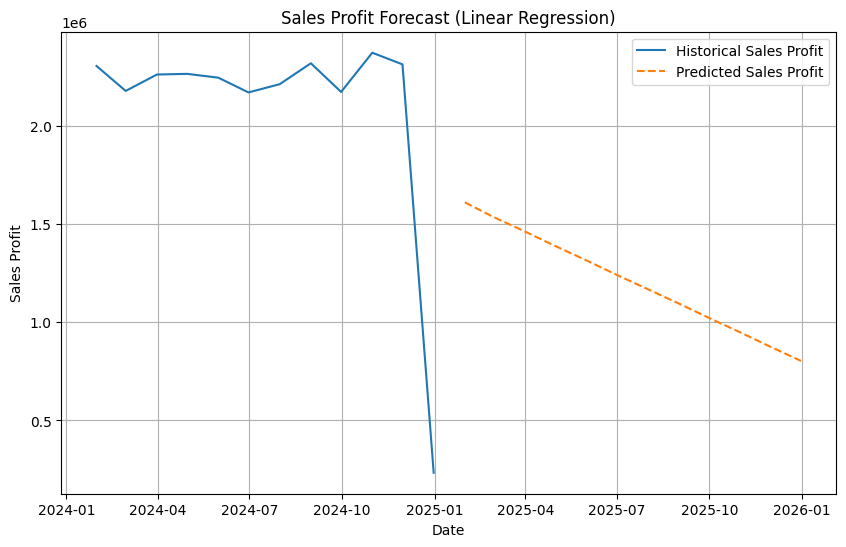

        Month  Predicted Sales Profit
0  2025-01-31            1.610139e+06
1  2025-02-28            1.536762e+06
2  2025-03-31            1.463384e+06
3  2025-04-30            1.390006e+06
4  2025-05-31            1.316629e+06
5  2025-06-30            1.243251e+06
6  2025-07-31            1.169873e+06
7  2025-08-31            1.096495e+06
8  2025-09-30            1.023118e+06
9  2025-10-31            9.497400e+05
10 2025-11-30            8.763623e+05
11 2025-12-31            8.029845e+05

Top 5 correlated columns with Sales Profit:
Quantity                     0.739751
Price                        0.584494
Customer ID                  0.019208
Selling Area Size (sq ft)    0.016925
Order ID                     0.011312
Name: Sales Profit, dtype: float64


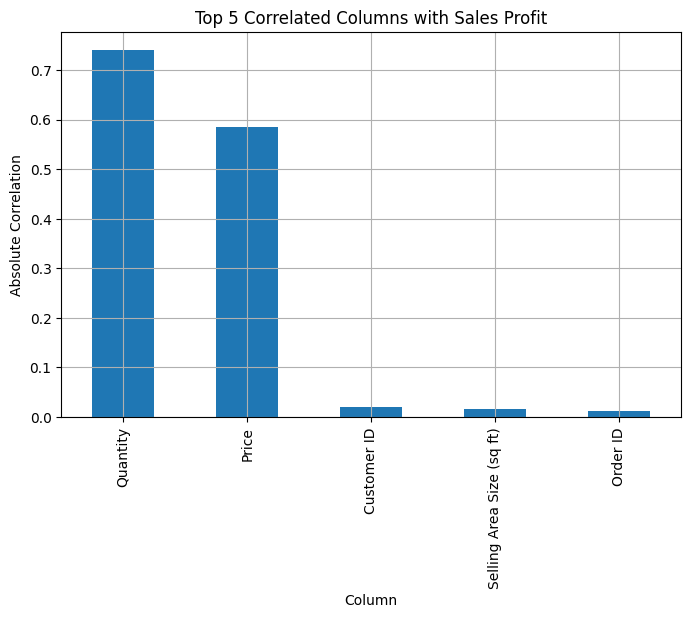

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Completely_Corrected_USA_Cities_Zudio_sales_data.csv")

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])
df.set_index('Order Date', inplace=True)

df_monthly = df.resample('M').sum()

df_monthly.reset_index(inplace=True)

df_monthly['Month_Num'] = np.arange(len(df_monthly))

X = df_monthly[['Month_Num']]
y = df_monthly['Sales Profit']

#Simple Linear Regression

model = LinearRegression()
model.fit(X, y)

future_months = np.arange(len(df_monthly), len(df_monthly)+12).reshape(-1, 1)
future_preds = model.predict(future_months)

future_dates = pd.date_range(start=df_monthly['Order Date'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')

plt.figure(figsize=(10,6))
plt.plot(df_monthly['Order Date'], y, label="Historical Sales Profit")
plt.plot(future_dates, future_preds, label="Predicted Sales Profit", linestyle='--')
plt.title("Sales Profit Forecast (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Sales Profit")
plt.legend()
plt.grid(True)
plt.show()

future_df = pd.DataFrame({'Month': future_dates, 'Predicted Sales Profit': future_preds})
print(future_df)

numeric_df = df.select_dtypes(include='number')

corrs = numeric_df.corr()['Sales Profit'].drop('Sales Profit').abs().sort_values(ascending=False).head(5)

print("\nTop 5 correlated columns with Sales Profit:")
print(corrs)

plt.figure(figsize=(8,5))
corrs.plot(kind='bar')
plt.title("Top 5 Correlated Columns with Sales Profit")
plt.ylabel("Absolute Correlation")
plt.xlabel("Column")
plt.grid(True)
plt.show()